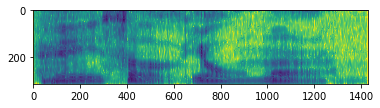

In [20]:
import cv2
from matplotlib import pyplot as plt
import librosa
from librosa import display
import numpy as np
dst = cv2.imread('spectrogram.jpg')
dst = np.average(dst, axis=2)
plt.figure()
plt.imshow(dst)


In [21]:
audio, sample_rate = librosa.load('NTU__f1147/NTU__f114703_0.wav')

spectrum = librosa.stft(audio)
reconstructed_audio = librosa.istft(spectrum.real)

sum(audio[:len(reconstructed_audio)] - reconstructed_audio)  # very close to 0


-0.011790639917307999

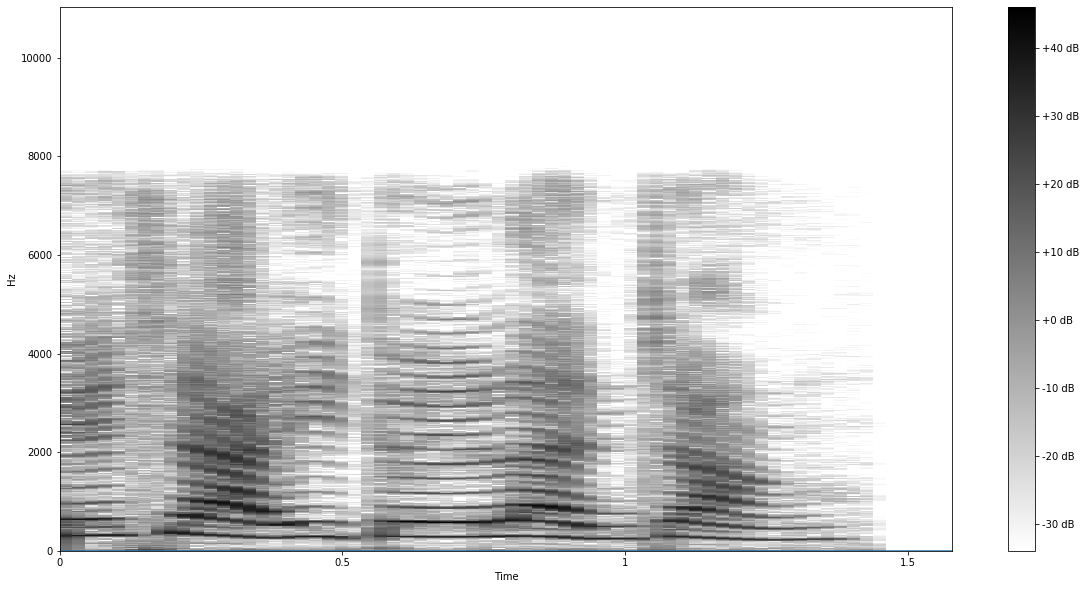

In [30]:
spectrum = librosa.stft(audio)
plt.figure(figsize=[20, 10])
ax = display.specshow(librosa.amplitude_to_db(spectrum), y_axis='linear', x_axis='time', cmap='binary'
)
plt.colorbar(format='%+2.0f dB')
# ax.set_ylim([0, 5000])
# ax.set_xlim([0, 1.558])
seaborn.distplot(spectrum[spectrum > 10].real.reshape(-1))

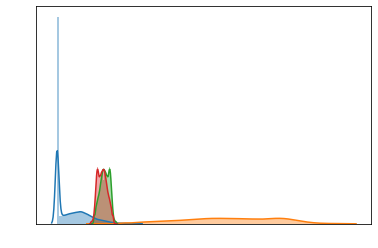

In [23]:
import seaborn
ref = librosa.amplitude_to_db(spectrum)
seaborn.distplot(ref.reshape(-1))

seaborn.distplot(dst.reshape(-1))

scaled = dst / 10
seaborn.distplot(scaled.reshape(-1))
ax = plt.gca()
ax.tick_params(colors='white')

scaled = scaled[::-1]
scaled = -scaled
scaled -= np.min(scaled)
seaborn.distplot(scaled.reshape(-1))


(628, 1429)


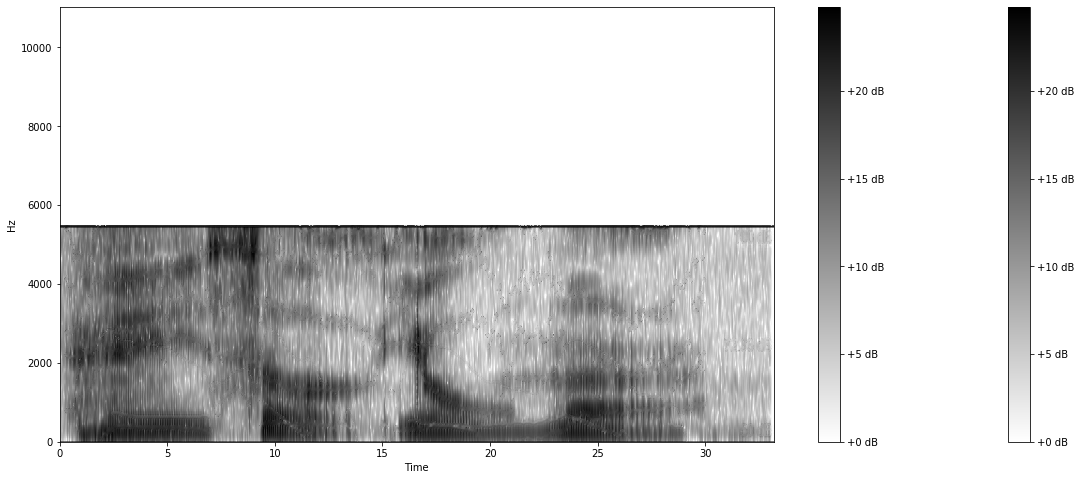

In [25]:
plt.figure(figsize=[20, 8])
ax = display.specshow(scaled, y_axis='linear', x_axis='time', cmap='binary')
plt.colorbar(format='%+2.0f dB')
# ax.set_ylim([0, 5000])
# ax.set_xlim([0, 1.558])

scaled2 = np.r_[
    scaled, np.zeros(scaled.shape)
]
print(scaled2.shape)

ax = display.specshow(scaled2, y_axis='linear', x_axis='time', cmap='binary'
)
plt.colorbar(format='%+2.0f dB')

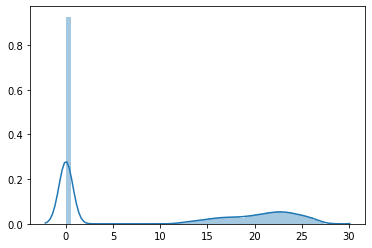

In [28]:
spec = librosa.amplitude_to_db(scaled2)
spec[spec<12] = 0
seaborn.distplot(spec.reshape(-1))
y = librosa.istft(spec)
librosa.output.write_wav('test.wav', y, 10000)